## Fandango Movie Ratings

![Image](https://www.counton2.com/wp-content/uploads/sites/7/2018/07/movie-popcorn-entertainment_1530120399830_382133_ver1.0_47007319_ver1.0.jpg?w=1280)

### Introduction

#### Context
In october 15, 2015 a data jourmalist Walt Hickey published his [article](https://fivethirtyeight.com/features/fandango-movies-ratings/) about [Fandango's rating system](https://www.fandango.com/). He analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased:
* The actual rating was almost always rounded up to the nearest half-star
* In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star
* For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars

After that Fandango's officials replied that it was a bug in their system, and they promised to fix it as soon as possible. Presumably, this has already happened, but we can't tell for sure since the actual rating value isn't displayed anymore.

In this project we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's article. We'll compare the system's characteristics previous and after the analysis for that purpose. And we have ready-made data for it:

* The data Walt Hickey collected to analyze for his article

* Movie ratings data for movies released in 2016 and 2017

Both data sets can be downloaded from this [Github repository](https://github.com/mircealex/Movie_ratings_2016_17).

#### First look

Let's read both files and take a look in their structure.

In [1]:
import pandas as pd

hickey = pd.read_csv('fandango_score_comparison.csv')
fresh = pd.read_csv('movie_ratings_16_17.csv')

hickey.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [2]:
fresh.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


### Analysis

#### A bit of cleaning

There are a lot of unnecessary columns. We'll separate only usefull:
* `FILM`, `Fandango_Stars`, `Fandango_Ratingvalue`, `Fandango_votes` and `Fandango_Difference` for the Hickey's set
* `movie`, `year` and `fandango` for the 2016-2017 set

In [3]:
before_article = hickey[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue',
                         'Fandango_votes', 'Fandango_Difference']].copy()

after_article = fresh[['movie', 'year', 'fandango']].copy()

before_article.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [4]:
after_article.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


Much better! Now let's recall our purpose. We must determine whether there has been any change in Fandango's rating system or not. So population of interest for our goal - all the movies that Fandango's system has.

But we'll work with two samples. To spread results to the whole population these **samples must be representative**. Fortunately to find it out we have `README.md` files that describe how samples were gathered.

The [Hickey's file](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md) tells us that the data set contains films that have:
* a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score
* at least 30 fan reviews on Fandango
* tickets on sale in 2015

And the [2016-1207 file](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md):
* the most popular movies (with a significant number of votes (no threshold))
* released in 2016 and 2017

It's clearly that sampling in both cases was **selective, not random**. Data was gathered specifically for analyst's purposes. Given this, it cannot be said that the samples are representative. Most likely they are not.


#### Tweaking the goal

At this point, we have at least two alternatives: either we collect new data, either we change the goal of our analysis by placing some limitations on it. The second one seems a much faster choice. Also, it's quasi-impossible to collect a new sample previous to Hickey's analysis at this moment in time.

So instead of finding any change in Fandango's rating system after Hickey's article we'll focus on **ratings changes  for popular movies between 2015 and 2016**.

#### Isolating the samples

With the new goal, we now have two populations that we want to describe and compare with each other:
* all Fandango's ratings for popular movies released in **2015**
* all Fandango's ratings for popular movies released in **2016**

To define term "popular" we'll use Hickey's benchmark of 30 fan ratings. Let's check it.

In [5]:
(before_article['Fandango_votes'] >= 30).all()

True

As was expected everything's fine with the Hickey's data.

There is no such info in the 2016-2017 data. Even `README.md` says the set contains only popular movies we still should check it. One quick way to do this is to sample randomly 10 movies from whole data set and find number of fan ratings manually.

We want to find that at least **8** of them satisfy the condition.

In [6]:
sample_10 = after_article.sample(10, random_state=0)
sample_10

,movie,year,fandango
197,The Take (Bastille Day),2016,4.0
37,Come and Find Me,2016,4.0
89,Kickboxer,2016,4.0
176,The Founder,2016,4.0
170,The Darkness,2016,2.5
75,Ice Age: Collision Course,2016,4.0
96,Lion,2016,4.0
137,Ride Along 2,2016,4.0
5,A Monster Calls,2016,4.0
83,Jane Got a Gun,2016,3.5


In [7]:
%%html
#Left align tables
<style> table {margin-left: 0 !important;} </style>

It turned out that Fandango's website uses [Rotten tomatoes](https://www.rottentomatoes.com/) ratings. So looking up these movies at the time of writing (October 2021) we have this:

| Movie                      | Votes         |
|----------------------------|---------------|
| The Take (Bastille Day)    | 2500+         |
| Come and Find Me           | 500+          |
| Kickboxer                  | 1000+         |
| The Founder                | 25,000+       |
| The Darkness               | 5,000+        |
| Ice Age: Collision Course  | 25,000+       |
| Lion                       | 25,000+       |
| Ride Along 2	             | 25,000+       |
| A Monster Calls            | 25,000+       |
| Jane Got a Gun             | 10,000+       |

Every movie from for our small sample has far more than 30 ratings. It reflects overall tendency in whole data set and we can be more confident about it's representativeness.

Also we need isolate movies by years: keep only 2015 in the `before_article` and only 2016 in the `after_article`. Before that we have to extract years from the `FILM` column in the first data set.

In [8]:
before_article['year'] = before_article['FILM'].str.extract(r'(?<=\()(\d{4})(?=\))')

before_2015 = before_article[before_article['year'] == '2015'].copy()
after_2016 = after_article[after_article['year'] == 2016].copy()

print('''2015 - {} movies
2016 - {} movies'''.format(len(before_2015), len(after_2016)))

2015 - 129 movies
2016 - 191 movies


#### Building the plots

After all preparations, we can now start analyzing the two samples. Let's start with building KDE plots for both samples and making a comparison between the shapes of the distributions.

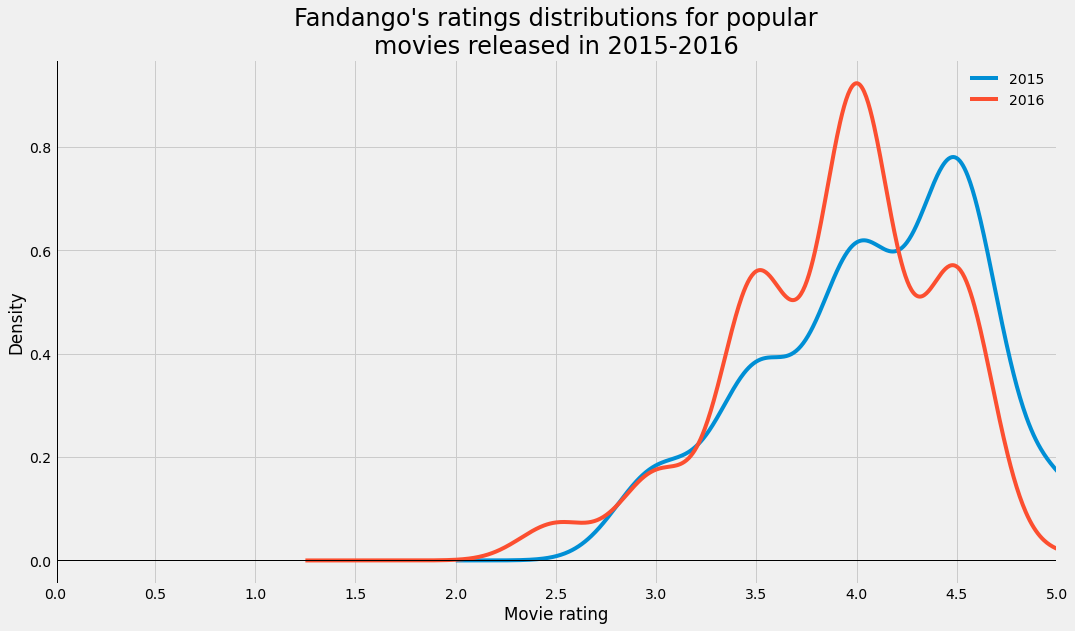

In [34]:
import matplotlib.pyplot as plt
import numpy as np

#Plots
fig = plt.figure(figsize=(16,9))
plt.style.use('fivethirtyeight')
before_2015['Fandango_Stars'].plot.kde(label='2015')
after_2016['fandango'].plot.kde(label='2016')

#Decorations
plt.title('''Fandango's ratings distributions for popular
movies released in 2015-2016''',
          fontdict = {'fontsize' : 24})

plt.xlim(0,5)
plt.xticks(np.arange(0, 5.5, 0.5))
plt.xlabel('Movie rating')
plt.legend(frameon=False)

#Axises
plt.axhline(y=0, color='k', linewidth=1)
plt.axvline(x=0.01, color='k', linewidth=1)

We can make some observations from these plots:
* Both distributions have similar shape. Both are left-skewed
* Both distributions have no movies with rating below **2.5** stars
* Distribution peak for 2015 is around **4.5** stars, for 2016 is around **4**. Peak moved to the left
* Distribution for 2016 is suspiciously symmetric around **4** stars

#### Frequency tables

Two samples clearly have some differences. The main one - movies in 2016 were rated lower than those in 2015. But by looking at the plots we can't measure the differences, samples have different number of movies.

Let's use frequencies tables and look at the numbers.

In [66]:
#Create freq table
freq_table_2015 = before_2015['Fandango_Stars'].value_counts()
freq_table_2016 = after_2016['fandango'].value_counts()
freq_table = pd.concat([freq_table_2015,
                      freq_table_2016], axis=1)

#Design table a bit
freq_table.columns = ['2015 absolute', '2016 absolute']
freq_table.fillna(0, inplace=True)
freq_table['2015 absolute'] = freq_table['2015 absolute'].astype('int')
freq_table.sort_index(ascending=False, inplace=True)

#Add percentage columns
prc_2015 = freq_table['2015 absolute'] / freq_table['2015 absolute'].sum()
prc_2015 = prc_2015.round(2) * 100
freq_table.insert(1, '2015 percentage', prc_2015)

prc_2016 = freq_table['2016 absolute'] / freq_table['2016 absolute'].sum()
freq_table['2016 percentage'] = prc_2016.round(2) * 100
freq_table

,2015 absolute,2015 percentage,2016 absolute,2016 percentage
5.0,9,7.0,1,1.0
4.5,49,38.0,47,25.0
4.0,37,29.0,77,40.0
3.5,23,18.0,46,24.0
3.0,11,9.0,14,7.0
2.5,0,0.0,6,3.0


Analyze the two tables and try to answer the following questions:

Is it still clear that there is a difference between the two distributions?
What can you tell about the direction of the difference just from the tables? Is the direction still that clear anymore?

Tables gave us more specific info about differences, for example from 2015 to 2016:
* The share of 5.0 stars films decreased by **6%**
* The share of 4.5 stars films decreased by **13%**
* The share of 4.0 stars films increased by **11%**, etc

The results is the same (of course) - the share of high rating movies decreased from 2015 to 2016. We even have numbers. However, the direction of the difference is not as clear as it was on the kernel density plots.

#### Summary statistics

To get a more precise picture about the direction of the difference we'll use the summary statistics for both samples: mean, median, and mode. Then we'll compare these statistics with the grouped bar plot.

In [109]:
#Statistics
mean_2015 = before_2015['Fandango_Stars'].mean()
median_2015 = before_2015['Fandango_Stars'].median()
mode_2015 = before_2015['Fandango_Stars'].mode()[0]

mean_2016 = after_2016['fandango'].mean()
median_2016 = after_2016['fandango'].median()
mode_2016 = after_2016['fandango'].mode()[0]

#Overall table
statistics = pd.DataFrame(columns=['2015', '2016'],
                         index=['Mean', 'Median', 'Mode'])

statistics['2015'] = [mean_2015, median_2015, mode_2015]
statistics['2016'] = [mean_2016, median_2016, mode_2016]
statistics

,2015,2016
Mean,4.085271,3.887435
Median,4.000000,4.000000
Mode,4.500000,4.000000


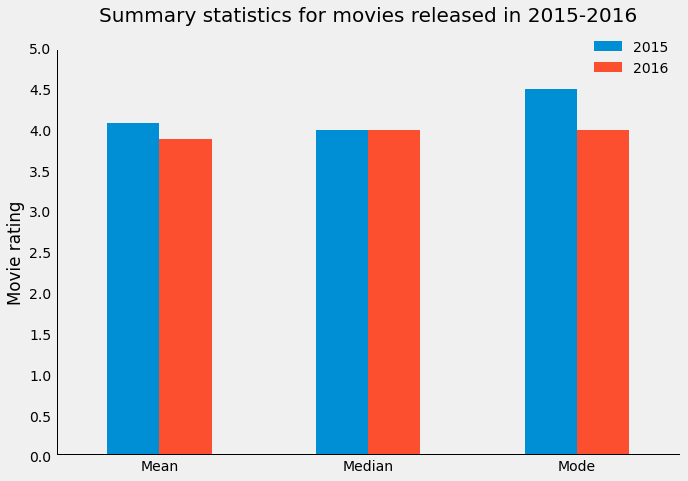

In [119]:
#Plot
statistics.plot.bar(figsize=(10,7), rot=0)

#Decorations
plt.title('Summary statistics for movies released in 2015-2016',
          fontdict = {'fontsize' : 20}, y=1.05)

plt.legend(frameon=False, bbox_to_anchor=(1, 1.05))
plt.yticks(np.arange(0, 5.5, 0.5))
plt.ylabel('Movie rating')
plt.grid(False)

#Axis
plt.axhline(y=0.03, color='k', linewidth=1)
plt.axvline(x=-0.49, color='k', linewidth=1)

We've got another proof that there were some changes in the movie ratings between 2015 and 2016. For exaple, mode decreased from **4,5** to **4.0**. And movies rating decreased by about **0.2** on average.

### Conclusion

In this project we've found that movie ratings changed for popular movies between 2015 and 2016. In 2016 popular movies were slightly lower rated rather than in 2015, on **0.2** on average.

We can't say for sure what did cause these changes. But it's likely that Fandango has fixed some bugs in their rating system after Hickey's article.

Further we could use ratings from other aggregators and compare them with Fandango's. This way we'll find the best site to check movie ratings.